# Predicting the Optimum No of cluster using K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
iris.shape

(150, 6)

In [5]:
#checking for Null Values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
#Drop the ID Column
iris = iris.drop('Id', axis = 1)

In [9]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
X = iris.iloc[: , :-1].values
y = iris.iloc[: , -1].values
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

 Plot from given Data of X and y for Sepal-length and sepal-width

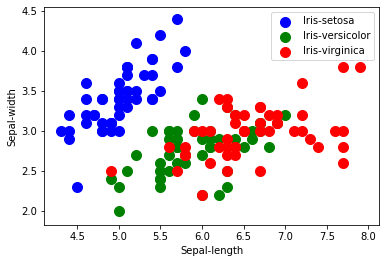

In [11]:
#Make the scatter plot from given Data of X and y for Sepal-length and sepal-width
plt.scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1], s= 100 ,color = 'blue', label = 'Iris-setosa')
plt.scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1], s= 100 ,color = 'green', label = 'Iris-versicolor')
plt.scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1], s = 100, color = 'red', label = 'Iris-virginica')
plt.legend()
plt.xlabel('Sepal-length')
plt.ylabel('Sepal-width')
plt.show()

Here, No Need to Splitting the data into train and test set because our aim is to Find Out Optimum No of Clusters  

# Using the elbow method to find the optimal number of cluster

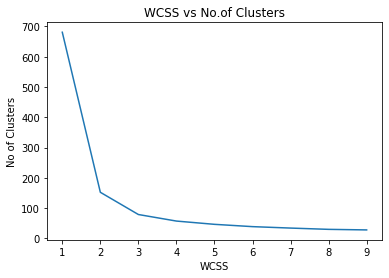

In [12]:
# Using the elbow method to find the optimal number of cluster
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('WCSS vs No.of Clusters')
plt.xlabel("WCSS")
plt.ylabel("No of Clusters")
plt.show()

WCSS (Within Cluster Sum of Squares) is always decreases with the increase in the number of clusters. However, it should be noted that, the rate of drop in WCSS starts to drop as we increase the number of clusters. We need to stop at the number of clusters (In this case 3) from where the rate of drop in WCSS doesn’t drop substantially.

In [13]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++', random_state = 5)
y_pred = kmeans.fit_predict(X)

In [14]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Visualise the Predicted Data of Sepal-length Vs Sepal-Width

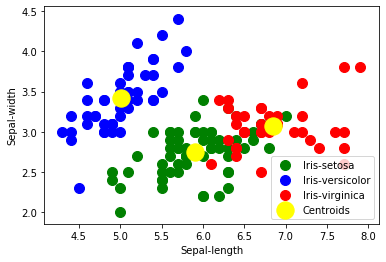

In [15]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s= 100 ,color = 'green', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s= 100 ,color = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, color = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.xlabel('Sepal-length')
plt.ylabel('Sepal-width')
plt.show()